# Assessed Problem #1

A simple pendulum can be driven by, for example, exerting a small oscillating
force horizontally on the mass. Then the equation of motion for the
pendulum becomes

$$ \frac{d^2\theta}{dt^2} = - \frac{g}{l}Sin(\theta) + C \times Cos(\theta)Sin(\Omega t) $$

where $C$ and $\Omega$ are constants. In the calculation below set $l= 10cm$, $C = 2s^{−2}$ and $\Omega = 5s^{-1}$

To make this equation dimensionless we redefine some variables:

$$\omega^2 = \frac{g}{l}$$

$$\beta = \frac{\Omega}{\omega} = \frac{\Omega}{\sqrt{\frac{g}{l}}}$$

$$\gamma = \frac{C}{\omega^2} = \frac{Cl}{g}$$

$$x = \omega t = t\sqrt{\frac{g}{l}}$$

then take a second look at that equation and rearrange some of the variables:

$$ (\frac{g}{l})\frac{d^2\theta}{d(t\sqrt{\frac{g}{l}})^2} = - \frac{g}{l}Sin(\theta) + \frac{Cl}{g}\frac{g}{l} \times Cos(\theta)Sin(\frac{\Omega}{\sqrt{\frac{g}{l}}}\sqrt{\frac{g}{l}}t) $$

admittedly this looks way more complicated than the original but if you hold out long enough to substitute in all of your new variables you'll find:

$$ \omega^2\frac{d^2\theta}{dx} = - \omega^2 Sin(\theta) + \gamma \omega^2 Cos(\theta)Sin(\beta x) $$

which cancels nicely down to this dimensionless equation

$$ \frac{d^2\theta}{dx} = - Sin(\theta) + \gamma Cos(\theta)Sin(\beta x) $$




To convert this single dimensionless second order differential equation into a system of linear equations, we must use a change of variables to facilitate the transition.

$let(G_1 = \theta)$

$let(G_2 = \frac{d\theta}{dx})$

$\frac{G_1}{dx} = \frac{d\theta}{dx} = G_2$

$\frac{G_2}{dx} = \frac{d^2\theta}{dx^2} = f(G_1,x)$


$\therefore \frac{dG_1}{dx} = G_2$

$\therefore \frac{dG_2}{dx} = - Sin(G_1) + \gamma Cos(G_1)Sin(\beta x) $

which is the system of equations that will be used to solve for $\theta$ (or $G_1$)


In [130]:
#Libraries
from numpy             import arange, amax, amin
from matplotlib.pyplot import plot, title, xlabel, ylabel, show
from run_kut4          import integrate
from scipy.integrate   import odeint
#

#Subroutines
def F(u,x):                                  #Defines the forced oscillator system:
    g1,g2 = u                                #Equate the new variables with the expected u value to satisfy the integration function
    
    #Capital Gs represent a single derivative with respect to x whereas a lowercase g represents no derivative
    #This is to counteract the fact that apostrophes are not permitted in variable names
    G1 = g2                                  #First Equation
    G2 = -sin(g1) + y*cos(g1)*sin(B*x)       #Second Equation
    
    return G1,G2                             #Return an array of both solutions theta and d(theta)/dx
#

#Constants
B     = 5 * sqrt(10E-2/9.81)                # Beta value
y     = 10E-2 * 2/ 9.81                     # Gamma value
#

#Computation
X = arange(0,400.,0.01)                     #Define the time range in terms of x
Y = odeint(F,[0.0,0.0],X)                   #Integrate the function in this range using the initial conditions [0.0,0.0]
B = 9.5 * sqrt(10E-2/9.81)                  #Redefine Beta to the paint where Resonance peaks
_Y = odeint(F,[0,0],X)                      #Integrate the function at full resonance

#X,Y = integrate(F,0.,array([0.,0.]),400.,0.1) Doesn't work yet probably wont ever

Ymax = []                                   #Define an empty array to store the maximum amplitude of each graph
Irange = arange(9,11,0.1)                   #Choose a range of omega values to test the resonance of
for I in Irange:                            #For every omega value in the range
    B = I * sqrt(10E-2/9.81)                #Redefine the value of beta
    Ymax.append(amax(odeint(F,[0,0],X)))    #and reintegrate the function, adding the maximum value to the array
                                            #This outputs an array of the maximum amplitude for every calculated omega
#

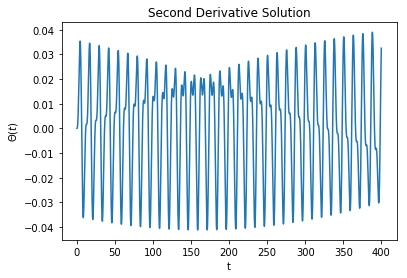

In [121]:
plot(X,Y[:,0])
title("Second Derivative Solution")
xlabel("t")
ylabel("$\Theta(t)$")
show()

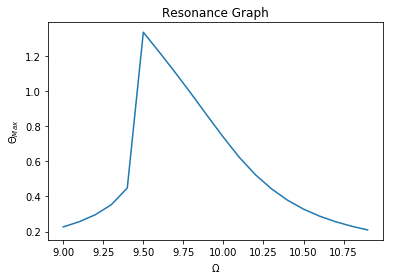

Peak Omega is : 9.5


In [123]:
plot(Irange,Ymax)
title("Resonance Graph")
xlabel("$\Omega$")
ylabel("$\Theta_{Max}$")
show()
print("Peak Omega is : " + str(amin(Irange) + Ymax.index(amax(Ymax))/10))

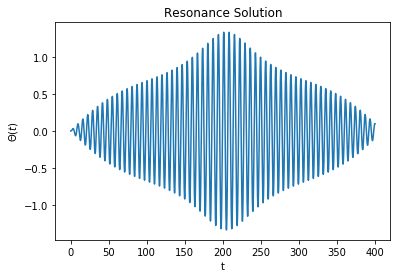

In [124]:
plot(X,_Y[:,0])
title("Resonance Solution")
xlabel("t")
ylabel("$\Theta(t)$")
show()

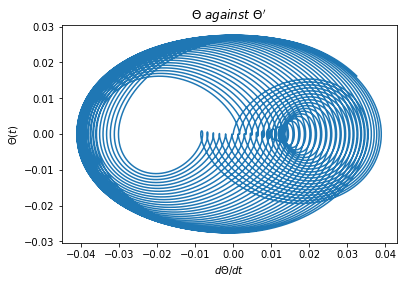

In [125]:
plot(Y[:,0],Y[:,1])
title("$\Theta \ against\  \Theta '$")
xlabel("$ {d\Theta}/{dt}$")
ylabel("$ \Theta(t) $")
show()